In [3]:
import signac
import flow
import numpy as np

from project import MyProject

print(signac.__version__)
print(flow.__version__)

1.2.0
0.9.0


### Before running this notebook:

First, run `python init.py` at least once to initialize the project. 

Then, run `python project.py run`, which will run all the operations in `project.py`.

Then, we get obtain a project handle.

In [8]:
project = MyProject()
print(project)

Ideal-Gas-Example-Project


Just like on the command line, we can display the project's status:

In [9]:
project.print_status(detailed=True, parameters=['p'])


Overview:

Total # of jobs: 10

label        ratio
-----------  --------------------------------------------------
started      |████████████████████████████████████████| 100.00%
sampled      |████████████████████████████████████████| 100.00%
initialized  |████████████████████████████████████████| 100.00%
estimated    |████████████████████████████████████████| 100.00%

operation
-----------


Detailed View:

job_id                            operation      p  labels
--------------------------------  -----------  ---  ----------------------------------------
20a9d48f7c3d95338db53b3dcf6d4577  [ ]          0.5  estimated, initialized, sampled, started
5d7a5c7d67a54ffd4ea1c1465ee1150d  [ ]          4    estimated, initialized, sampled, started
9ad9a85e7580593b374f2ffb48d584c4  [ ]          2    estimated, initialized, sampled, started
e439a301971f9dcecb1905609f2389d0  [ ]          2.5  estimated, initialized, sampled, started
15be99b6d7aaa607a1c03adb986f3552  [ ]          3    estimated, 

We want to compare the volume estimate using the ideal gas law and the measurements from the molecular dynamics simulation.

We implement the `get_volume()` function to extract the volume from the log file.

In [10]:
def get_volume(job):
    try:
        log = np.genfromtxt(job.fn('dump.log'), names=True)
        N = len(log)
        return log[int(0.5 * N):]['volume'].mean(axis=0)
    except OSError:
        pass

for job in project.find_jobs():
    print(job.statepoint()['p'], get_volume(job))

0.5 1139.3264905719998
4.0 614.750191224
2.0 741.011125508
2.5 686.3928969000001
3.0 662.2078703
4.5 600.001185592
1.5 791.728728196
5.0 593.777573608
3.5 634.2033970919999
1.0 903.9505265920001


For a better presentation of the results we need to aggregate all results and sort them by pressure.

*The following code requires matplotlib.*

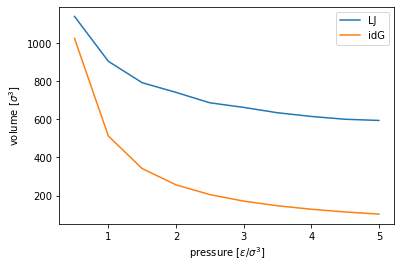

In [11]:
# Display plots within the notebook
from matplotlib import pyplot as plt
%matplotlib inline

V = dict()
V_idg = dict()

for job in project.find_jobs():
    V[job.statepoint()['p']] = get_volume(job)
    V_idg[job.statepoint()['p']] = job.document['volume_estimate']
    
p = sorted(V.keys())
V = [V[p_] for p_ in p]
V_idg = [V_idg[p_] for p_ in p]

plt.plot(p, V, label='LJ')
plt.plot(p, V_idg, label='idG')
plt.xlabel(r'pressure [$\epsilon / \sigma^3$]')
plt.ylabel(r'volume [$\sigma^3$]')
plt.legend()